In [156]:
import os 
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
import sys
import scipy.io as sio
sys.path.append(r'C:/Users/scanimage/Documents/JJM/post_cnmfe_analysis/')
import miniscope_analysis as ma
%matplotlib tk

In [157]:
##paths to data directories
path_to_rotary_data = r'F:/JJM/running_wheel_analysis/r2_8_day_1/'

In [158]:
##load up output file generated from MATLAB with timestamps 
rotary_output_file = 'r2_8_day1_00.csv'
rotarty_output_df = pd.read_csv(path_to_rotary_data+rotary_output_file, delimiter=';')
##path to miniscope timestamps dataframe 
miniscope_timestamps_df = pd.read_csv(path_to_rotary_data+'My_V4_Miniscope/'+'11_47_37_timeStamps.csv')
##path to cnmfe output 
cnmfe_results_file = r'F:\JJM\running_wheel_analysis\r2_8_day_1\cnmfe_output\20-May_20_46_25_out.mat'
cnmfe_results = sio.loadmat(cnmfe_results_file)

In [159]:
rotarty_output_df.head()

,Var1,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,absoluteVelocity,vectorVelocity,instantaneousIntervals,miniscopeFrameGrabTTL,FileName
0,11:44:01.002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413394,NaN,2.419,0.000000,20220128-1144rotary_test_out.csv
1,11:44:01.092,-3.769811,1.926396,3.774039,3.777460,3.776005,1.403985,0.005717,0.011668,0.413394,-0.413394,2.419,1.926396,20220128-1144rotary_test_out.csv
2,11:44:01.103,-3.772355,1.921309,3.768949,3.774915,3.770912,1.396351,0.000620,0.006575,0.413394,-0.413394,2.419,1.921309,20220128-1144rotary_test_out.csv
3,11:44:01.114,-3.769811,1.913680,3.776584,3.767282,3.776005,1.396351,0.005717,-0.001064,0.413394,-0.413394,2.419,1.913680,20220128-1144rotary_test_out.csv
4,11:44:01.123,-3.762178,1.926396,3.779128,3.780004,3.781098,1.403985,0.010813,0.006575,0.413394,-0.413394,2.419,1.926396,20220128-1144rotary_test_out.csv


In [160]:
miniscope_frame_grabs_onset = ma.count_events_in_array(rotarty_output_df['miniscopeFrameGrabTTL'].values, 1, 0, threshold=0.5, up=False)[1]
miniscope_frame_grabs_offset = ma.count_events_in_array(rotarty_output_df['miniscopeFrameGrabTTL'].values, 1, 0, threshold=0.5, up=True)[1]

In [161]:
#need to find 1st TTL pulse 
#condition is less than 0.5, TTL is negative going? 
miniscope_frame_grabs_onset = ma.count_events_in_array(rotarty_output_df['miniscopeFrameGrabTTL'].values, 1, 0, threshold=1.5, up=False)[1]
miniscope_frame_grabs_offset = ma.count_events_in_array(rotarty_output_df['miniscopeFrameGrabTTL'].values, 1, 0, threshold=0.5, up=True)[1]
first_frame = miniscope_frame_grabs_onset[1]
last_frame = miniscope_frame_grabs_offset[-1]
miniscope_acquisition_region=rotarty_output_df.loc[first_frame:last_frame]
miniscope_acquisition_td = miniscope_acquisition_region.set_index(pd.to_timedelta(miniscope_acquisition_region['Var1']))
#resample miniscope aligned region to match miniscope output
miniscope_acquisition_region_resampled = miniscope_acquisition_td.resample('0.05S').mean()

In [162]:
miniscope_acquisition_region_resampled.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,absoluteVelocity,vectorVelocity,instantaneousIntervals,miniscopeFrameGrabTTL
Var1,,,,,,,,,,,,
0 days 11:44:37.056000,-0.751467,-1.358291,3.773530,0.757177,2.267078,1.397369,0.003678,1.514592,20.755536,-20.755536,0.0482,-1.358291
0 days 11:44:37.106000,0.001423,1.375387,3.774463,0.002742,1.891755,1.397623,0.007415,1.888837,17.731683,-17.731683,0.0570,1.375387
0 days 11:44:37.156000,0.755161,-0.703694,3.773021,-2.260562,1.512359,1.394824,0.003168,3.022099,9.650161,-9.650161,0.1408,-0.703694
0 days 11:44:37.206000,0.754653,1.921818,3.770985,3.772371,1.511850,1.395842,0.004188,0.005047,5.154639,-5.154639,0.1940,1.921818
0 days 11:44:37.256000,-3.767775,-1.358800,3.774548,3.773388,3.774477,1.397369,0.002659,0.004538,5.154639,-5.154639,0.1940,-1.358800


In [163]:
#need to match frames in miniscope timestamps df with TTL df by starting with intitial absolute time value from TTL 
#dataframe and adding a difference value from the miniscope timestamps df iteratively 

In [164]:
timestamps_diff_df = miniscope_timestamps_df.diff()
timestamps_diff_td = pd.to_timedelta(timestamps_diff_df['Time Stamp (ms)'][1:], unit='ms')
firstgrab = [miniscope_acquisition_region_resampled.index[0]]
firstgrab.extend([miniscope_acquisition_region_resampled.index[0]+(timestamps_diff_td.iloc[0:i].sum()) for i in range(1,len(timestamps_diff_td))])
firstgrab.extend([miniscope_acquisition_region_resampled.index[0]+timestamps_diff_td.sum()])
#these are miniscope frame grab times, need to be aligned to closest events in the velocity dataframe
DAQ_frame_grabs_aligned = pd.DataFrame(firstgrab, columns=['miniscope DAQ frame grab time']) 
#first align to CNMFE data for each cell 
DAQ_frame_grabs_CNMFE_data = pd.concat([DAQ_frame_grabs_aligned, pd.DataFrame(np.transpose(cnmfe_results['C']))], axis=1)
miniscope_acquisition_region_resampled_to_merge = miniscope_acquisition_region_resampled.reset_index()
miniscope_acquisition_region_resampled_to_merge = miniscope_acquisition_region_resampled_to_merge.rename(columns={'Var1':'Encoder DAQ times'})

In [165]:
CNMFE_rotary_data_aligned = pd.merge_asof(DAQ_frame_grabs_CNMFE_data, miniscope_acquisition_region_resampled_to_merge, 
              left_on='miniscope DAQ frame grab time', right_on='Encoder DAQ times', direction='nearest')
## check differences between time stamps, maybe in case frames dropped
drift = CNMFE_rotary_data_aligned['miniscope DAQ frame grab time']-CNMFE_rotary_data_aligned['Encoder DAQ times']
abs_drift = abs(CNMFE_rotary_data_aligned['miniscope DAQ frame grab time']-CNMFE_rotary_data_aligned['Encoder DAQ times'])

In [166]:
CNMFE_rotary_data_aligned

,miniscope DAQ frame grab time,0,1,2,3,4,5,6,7,8,...,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,absoluteVelocity,vectorVelocity,instantaneousIntervals,miniscopeFrameGrabTTL
0,0 days 11:44:37.056000,0.087201,0.133408,0.000000,0.073530,0.000000,0.420685,0.342688,0.122362,0.222316,...,3.773530,0.757177,2.267078,1.397369,0.003678,1.514592,20.755536,-20.755536,0.0482,-1.358291
1,0 days 11:44:37.106000,0.085049,0.125004,0.000000,0.093342,0.000000,0.405197,0.312028,0.118520,0.222861,...,3.774463,0.002742,1.891755,1.397623,0.007415,1.888837,17.731683,-17.731683,0.0570,1.375387
2,0 days 11:44:37.154000,0.118986,0.117129,0.000000,0.085626,0.000000,0.437800,0.284111,0.114798,0.205736,...,3.773021,-2.260562,1.512359,1.394824,0.003168,3.022099,9.650161,-9.650161,0.1408,-0.703694
3,0 days 11:44:37.206000,0.150854,0.109751,0.000000,0.078547,0.000000,0.462593,0.258691,0.111193,0.189927,...,3.770985,3.772371,1.511850,1.395842,0.004188,0.005047,5.154639,-5.154639,0.1940,1.921818
4,0 days 11:44:37.256000,0.147132,0.102837,0.000000,0.072054,0.000000,0.432905,0.235546,0.107701,0.230425,...,3.774548,3.773388,3.774477,1.397369,0.002659,0.004538,5.154639,-5.154639,0.1940,-1.358800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35615,0 days 12:14:39.439000,0.000065,0.215363,0.054204,0.287164,0.063922,0.002536,0.055791,0.008468,0.007870,...,-3.770271,3.774279,3.777278,1.395079,3.779007,0.006575,0.165289,-0.165289,6.0500,1.100519
35616,0 days 12:14:39.489000,0.000048,0.194416,0.096996,0.256032,0.061024,0.002344,0.051849,0.004085,0.007307,...,-3.771543,3.774915,3.774732,1.395927,3.776671,0.006151,0.165289,-0.165289,6.0500,-0.266617
35617,0 days 12:14:39.539000,0.000035,0.228902,0.081913,0.228274,0.058257,0.002166,0.048185,0.003843,0.023837,...,-3.767980,3.773897,3.779570,1.393298,3.778625,0.000973,0.165289,-0.165289,6.0500,0.607536
35618,0 days 12:14:39.592000,0.000025,0.206638,0.069175,0.203526,0.055616,0.002002,0.044780,0.003616,0.022131,...,-3.765945,3.774915,3.780588,1.397878,3.779134,0.002501,0.165289,-0.165289,6.0500,-0.702677


In [ ]:
#will need to add in a deeplabcut analysis to check if animal is on the rotary encoder 

In [172]:
plt.plot(CNMFE_rotary_data_aligned['absoluteVelocity'])
plt.show()

In [171]:
plt.plot(CNMFE_rotary_data_aligned[0])
plt.show()

In [115]:
CNMFE_rotary_data_aligned

,miniscope DAQ frame grab time,0,1,2,3,4,5,6,7,8,...,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,absoluteVelocity,vectorVelocity,instantaneousIntervals,miniscopeFrameGrabTTL
0,0 days 11:44:37.056000,0.087201,0.133408,0.000000,0.073530,0.000000,0.420685,0.342688,0.122362,0.222316,...,3.773530,0.757177,2.267078,1.397369,0.003678,1.514592,20.755536,-20.755536,0.0482,-1.358291
1,0 days 11:44:37.106000,0.085049,0.125004,0.000000,0.093342,0.000000,0.405197,0.312028,0.118520,0.222861,...,3.774463,0.002742,1.891755,1.397623,0.007415,1.888837,17.731683,-17.731683,0.0570,1.375387
2,0 days 11:44:37.154000,0.118986,0.117129,0.000000,0.085626,0.000000,0.437800,0.284111,0.114798,0.205736,...,3.774463,0.002742,1.891755,1.397623,0.007415,1.888837,17.731683,-17.731683,0.0570,1.375387
3,0 days 11:44:37.206000,0.150854,0.109751,0.000000,0.078547,0.000000,0.462593,0.258691,0.111193,0.189927,...,3.770985,3.772371,1.511850,1.395842,0.004188,0.005047,5.154639,-5.154639,0.1940,1.921818
4,0 days 11:44:37.256000,0.147132,0.102837,0.000000,0.072054,0.000000,0.432905,0.235546,0.107701,0.230425,...,3.774548,3.773388,3.774477,1.397369,0.002659,0.004538,5.154639,-5.154639,0.1940,-1.358800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35615,0 days 12:14:39.439000,0.000065,0.215363,0.054204,0.287164,0.063922,0.002536,0.055791,0.008468,0.007870,...,-3.768998,3.776951,3.779570,1.399404,3.781173,0.003519,0.165289,-0.165289,6.0500,-0.044010
35616,0 days 12:14:39.489000,0.000048,0.194416,0.096996,0.256032,0.061024,0.002344,0.051849,0.004085,0.007307,...,-3.770271,3.774279,3.777278,1.395079,3.779007,0.006575,0.165289,-0.165289,6.0500,1.100519
35617,0 days 12:14:39.539000,0.000035,0.228902,0.081913,0.228274,0.058257,0.002166,0.048185,0.003843,0.023837,...,-3.771543,3.774915,3.774732,1.395927,3.776671,0.006151,0.165289,-0.165289,6.0500,-0.266617
35618,0 days 12:14:39.592000,0.000025,0.206638,0.069175,0.203526,0.055616,0.002002,0.044780,0.003616,0.022131,...,-3.767980,3.773897,3.779570,1.393298,3.778625,0.000973,0.165289,-0.165289,6.0500,0.607536


In [120]:
first_grab = [miniscope_acquisition_region_resampled.index[0]]
first_grab.extend([miniscope_acquisition_region_resampled.index[i]+timestamps_diff_td.iloc[i] for i in range(len(timestamps_diff_td))])

In [122]:
pd.DataFrame(first_grab)

,0
0,0 days 11:44:37.056000
1,0 days 11:44:37.106000
2,0 days 11:44:37.154000
3,0 days 11:44:37.208000
4,0 days 11:44:37.256000
...,...
35615,0 days 12:14:17.808000
35616,0 days 12:14:17.856000
35617,0 days 12:14:17.906000
35618,0 days 12:14:17.959000


In [124]:
#use timestamp from miniscope DAQ to loop through array
first_grab = [miniscope_acquisition_region_resampled.index[0]]
first_grab.extend([miniscope_acquisition_region_resampled.index[i]+timestamps_diff_td.iloc[i] for i in range(len(timestamps_diff_td))])
DAQ_frame_grabs_aligned = pd.DataFrame(first_grab, columns=['Time of Frame Grab DAQ Board'])

In [148]:
first_grab = [miniscope_acquisition_region_resampled.index[0]]

In [149]:
first_grab = pd.to_timedelta(timestamps_diff_df['Time Stamp (ms)'][1:], unit='ms')

[Timedelta('0 days 11:44:37.056000')]

In [150]:
miniscope_timestamps_df

,Frame Number,Time Stamp (ms),Buffer Index
0,0,-43,0
1,1,7,0
2,2,55,0
3,3,107,0
4,4,157,0
...,...,...,...
35615,35615,1802340,0
35616,35616,1802390,0
35617,35617,1802440,0
35618,35618,1802493,0


In [127]:
DAQ_frame_grabs_aligned.head()

,Time of Frame Grab DAQ Board
0,0 days 11:44:37.056000
1,0 days 11:44:37.106000
2,0 days 11:44:37.154000
3,0 days 11:44:37.208000
4,0 days 11:44:37.256000


In [128]:
miniscope_acquisition_region_resampled.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,absoluteVelocity,vectorVelocity,instantaneousIntervals,miniscopeFrameGrabTTL
Var1,,,,,,,,,,,,
0 days 11:44:37.056000,-0.751467,-1.358291,3.773530,0.757177,2.267078,1.397369,0.003678,1.514592,20.755536,-20.755536,0.0482,-1.358291
0 days 11:44:37.106000,0.001423,1.375387,3.774463,0.002742,1.891755,1.397623,0.007415,1.888837,17.731683,-17.731683,0.0570,1.375387
0 days 11:44:37.156000,0.755161,-0.703694,3.773021,-2.260562,1.512359,1.394824,0.003168,3.022099,9.650161,-9.650161,0.1408,-0.703694
0 days 11:44:37.206000,0.754653,1.921818,3.770985,3.772371,1.511850,1.395842,0.004188,0.005047,5.154639,-5.154639,0.1940,1.921818
0 days 11:44:37.256000,-3.767775,-1.358800,3.774548,3.773388,3.774477,1.397369,0.002659,0.004538,5.154639,-5.154639,0.1940,-1.358800


In [138]:
plt.plot(miniscope_acquisition_region_resampled.index)
plt.show()

In [139]:
plt.plot(DAQ_frame_grabs_aligned)
#plt.plot(miniscope_acquisition_region_resampled.index)
plt.show()


In [146]:
len(timestamps_diff_td)

35619

In [147]:
len(DAQ_frame_grabs_aligned)

35620

In [145]:
timestamps_diff_td.sum()

Timedelta('0 days 00:30:02.585000')

In [143]:
DAQ_frame_grabs_aligned['Time of Frame Grab DAQ Board'].iloc[-1]-DAQ_frame_grabs_aligned['Time of Frame Grab DAQ Board'].iloc[0]

Timedelta('0 days 00:29:40.949000')

In [100]:
DAQ_frame_grabs_aligned

,Time of Frame Grab DAQ Board
0,0 days 11:44:37.106000
1,0 days 11:44:37.154000
2,0 days 11:44:37.208000
3,0 days 11:44:37.256000
4,0 days 11:44:37.307000
...,...
35614,0 days 12:14:17.808000
35615,0 days 12:14:17.856000
35616,0 days 12:14:17.906000
35617,0 days 12:14:17.959000


In [89]:
miniscope_acquisition_region_resampled.index[0]

Timedelta('0 days 11:44:37.056000')

In [85]:
len(DAQ_frame_grabs_aligned)

35619

In [94]:
DAQ_frame_grabs_aligned[35618]

Timedelta('0 days 12:14:18.005000')

In [95]:
range(len(timestamps_diff_td))

range(0, 35619)

In [81]:
miniscope_timestamps_df

,Frame Number,Time Stamp (ms),Buffer Index
0,0,-43,0
1,1,7,0
2,2,55,0
3,3,107,0
4,4,157,0
...,...,...,...
35615,35615,1802340,0
35616,35616,1802390,0
35617,35617,1802440,0
35618,35618,1802493,0


In [72]:
#miniscope_timestamps_td = [pd.to_timedelta(timestamps_diff_df['Time Stamp (ms)'][1:], unit='ms')[i]+pd.to_timedelta(timestamps_diff_df['Time Stamp (ms)'][1:], unit='ms')[i+1] for i in range(1,len(timestamps_diff_df['Time Stamp (ms)']))]

KeyboardInterrupt: 

In [68]:
miniscope_timestamps_td

1       0 days 11:44:37.106000
2       0 days 11:44:37.104000
3       0 days 11:44:37.108000
4       0 days 11:44:37.106000
5       0 days 11:44:37.107000
                 ...          
35615   0 days 11:44:37.108000
35616   0 days 11:44:37.106000
35617   0 days 11:44:37.106000
35618   0 days 11:44:37.109000
35619   0 days 11:44:37.105000
Name: Time Stamp (ms), Length: 35619, dtype: timedelta64[ns]

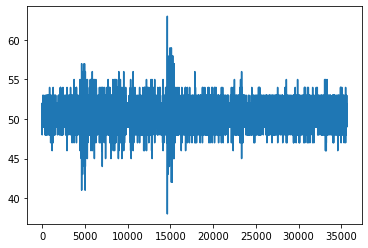

In [47]:
plt.plot(timestamps_diff_df['Time Stamp (ms)'])
plt.show()

In [49]:
rotarty_output_df['Var1'].loc[first_frame]

'11:44:37.056'

In [50]:
rotarty_output_df['Var1'].loc[last_frame]

'12:14:39.592'

In [59]:
((miniscope_timestamps_df['Time Stamp (ms)'].loc[35619]-miniscope_timestamps_df['Time Stamp (ms)'].loc[0])/1000)/60

30.043083333333335

In [60]:
0.04*60

2.4

In [54]:
miniscope_timestamps_df['Time Stamp (ms)']

0            -43
1              7
2             55
3            107
4            157
          ...   
35615    1802340
35616    1802390
35617    1802440
35618    1802493
35619    1802542
Name: Time Stamp (ms), Length: 35620, dtype: int64

In [ ]:
##previous 

In [85]:
rotary_data_files.sort()
rotary_timestamps.sort()

In [84]:
reg_exp_rotary_files = 'rotary_test_out.csv'
reg_exp_rotary_timestamps = 'rotary_test_out_timestamps.csv'
rotary_data_files = [fname for fname in os.listdir(path_to_rotary_data) if reg_exp_rotary_files in fname]
rotary_timestamps = [fname for fname in os.listdir(path_to_rotary_data) if reg_exp_rotary_timestamps in fname]

In [86]:
##read everything into a dataframe 
# A&B channels (MATLAB indexing)
# A = encoder_data{:,1}
# B = encoder_data{:,5}
# index = encoder_data{:,3}
# scope TTL appears to be in AI1

In [87]:
encoder_data = pd.read_csv(path_to_rotary_data+rotary_data_files[10], names = ['A', 'ScopeTTL', 'index', '-1', 'B', '-2', '-3', '-0'])

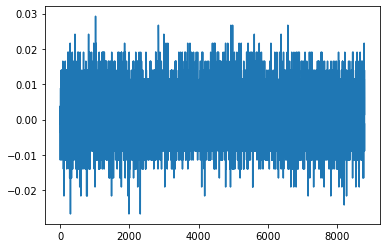

In [88]:
plt.plot(encoder_data['ScopeTTL'])

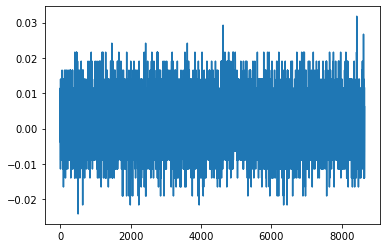

In [64]:
plt.plot(encoder_data['-0'])